<a href="https://colab.research.google.com/github/YinterestingProjects/human-wildlife-interactions/blob/main/TestingWithSally2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# helper function to allow all debug print statements to be turned on or off. 
# Please use dprint for any debugging print statements or other output that you don't want to clutter the interface
dbug = 1
def dprint(msg):
  if dbug == 1:
    print(msg)
  else:
    pass

# Setup Instructions

## Step 1
In the box below uncomment your name (make sure the others are commented out)

In [2]:
user = "sally"
#user = "jina"
# user = "josh"

## Step 2a
If you have not already done so, go to your google drive and do the following (Sally, you can skip this step and go straight to 2b):


1.   Click on shared with me
2.   Find the folder "MADS Capstone"
3.   Right click and select "Add shortcut to Drive"
4.   Place the shortcut wherever you want within your own drive


## Step 2b
Add the path to the variable in the cell below corresponding with your name. If you have not already done so do the following steps:
1.   On the lefthand side of Colab there should be several icons. Find the one that looks like a folder and select it.
2.   In the new menu that expanded, there should be 4 icons below the word "Files". Find the 3rd one over that looks like a folder with a drive logo on it and select it. If prompted to allow colab to access your drive select the yes option (or whatever language it is now).
3.   There should now be a new folder in the list that says "drive". Navigate into this folder and find the shortcut you just created (Sally, you obviously don't have a shortcut so just find the original directory in your drive). Either right click on that shortcut or click the 3 dots next to the folder and select "Copy Path".
4.   Go to the box below and paste in the path to path corresponding to your name.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# directory setup
try:
  if user == "sally":
    directory = "SALLY: INSERT YOUR PATH HERE"
  elif user == "jina":
    directory = "JINA: INSERT YOUR PATH HERE"
  elif user == "josh":
    directory = "/content/drive/MyDrive/MADS Capstone"
except:
  dprint("No user has been selected")

## Step 3
From here everything is the same as a normal setup. Please make sure you save to github.

# Read in sample data


In [5]:
import tensorflow as tf
import pandas as pd
from IPython.display import YouTubeVideo
from google.cloud import storage, exceptions

In [6]:
# video file
video_record = '/content/drive/MyDrive/MADS/MADS_Capstone/data/video_sample/train0093.tfrecord'

In [7]:
# function to read in a video tf record, credit (https://medium.com/google-cloud/youtube-8m-dataset-c2ee9c79d136)

def read_videoTfRecord(record, print_stats=True):
    # variables for different parts of the TFRecord data
    vid_ids = []
    labels = []
    rgb = []
    audio = []

    # iterate and read through all the examples in TFRecord file
    for example in tf.compat.v1.python_io.tf_record_iterator(record):
        seq_example = tf.train.Example.FromString(example)
        vid_ids.append(seq_example.features.feature['id']
                      .bytes_list.value[0].decode(encoding='UTF-8'))
        labels.append(seq_example.features.feature['labels'] 
                      .int64_list.value)
        rgb.append(seq_example.features.feature['mean_rgb']
                      .float_list.value)
        audio.append(seq_example.features.feature['mean_audio']
                      .float_list.value)
        
    # optional stats printing
    if print_stats:
      print('Number of videos in this tfrecord: ',len(vid_ids))
      print('Number of labels in this tfrecord: ', len(labels))
      print('Picking a youtube video id:',vid_ids[15])

    return vid_ids, labels, rgb, audio

In [9]:
vid_ids, labels, rgb, audio = read_videoTfRecord(video_record, print_stats=True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Number of videos in this tfrecord:  1015
Number of labels in this tfrecord:  1015
Picking a youtube video id: NYbF


In [10]:
vid_ids[:5]

['eXbF', 'BFbF', 'GqbF', 'XabF', '3mbF']

In [11]:
labels[:5]

[[0, 12],
 [16, 25, 189, 645, 741, 2052],
 [2, 44, 64, 113, 119, 186, 425],
 [3],
 [1, 5]]

In [12]:
len(rgb[:1][0])

1024

In [13]:
len(audio[:1][0])

128

In [29]:
## video id to url translation 
#curl http://data.yt8m.org/2/j/i/op/op00.js
import requests

def generate_url(id):
  ''' convert Youtube8M dataset-specific video IDs to true youtube catalog IDs and url '''
 
  call_str = f'http://data.yt8m.org/2/j/i/{id[:2]}/{id}.js'
  res = requests.get(call_str)
  res_lst = res.text.split('"')

  yt_id = res_lst[3]
  url = f'https://www.youtube.com/watch?v={yt_id}'

  return yt_id, url

In [28]:
generate_url('XabF')

('ET9HqjaO9xg', 'https://www.youtube.com/watch?v=ET9HqjaO9xg')

In [16]:
! curl http://data.yt8m.org/2/j/i/BF/BFbF.js

i("BFbF","-1HyXRBhVA0");

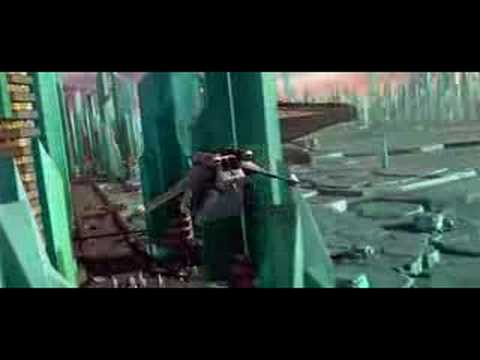

In [17]:
YouTubeVideo('-1HyXRBhVA0')